In [1]:
from fastai.vision.all import *


In [2]:
bs = 16


In [3]:
dls = ImageDataLoaders.from_folder('./data', item_tfms=Resize(460), bs=bs,
batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

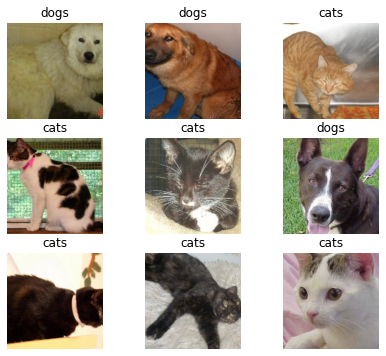

In [4]:
dls.show_batch(max_n=9, figsize=(7,6))

In [5]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(lr_min=0.00831763744354248, lr_steep=1.9054607491852948e-06)

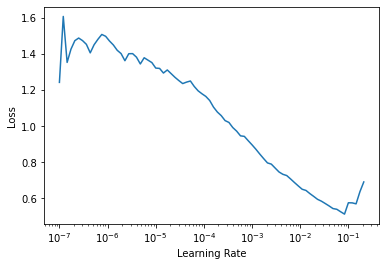

In [6]:
learn.lr_find()

In [7]:
learn.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.348485,0.386258,0.925000,03:28
1,0.356380,0.368965,0.925000,03:28
2,0.431375,1.076870,0.825000,03:28
3,0.521215,1.830248,0.700000,03:29
4,0.559199,0.127903,0.975000,03:27
5,0.421203,0.816117,0.850000,03:26
6,0.410788,0.133928,0.950000,03:26
7,0.370550,0.062282,0.950000,03:26
8,0.322948,0.091689,0.950000,03:25
9,0.251560,0.103951,0.925000,03:27


In [8]:
learn.save('stage-1-50');

In [9]:
learn.unfreeze()
learn.fit_one_cycle(5, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.118356,0.095540,0.925000,04:26
1,0.116851,0.096160,0.925000,04:25
2,0.154616,0.072291,0.975000,04:28
3,0.131664,0.087769,0.975000,04:26
4,0.115506,0.084534,0.925000,04:25


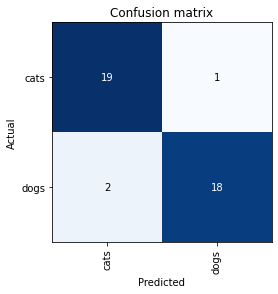

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(
)